In [25]:
# Import local libraries
import importlib
import numpy as np
import time
import pandas as pd
import os

import csv_decoder  #self-defined
import save_and_load #self-defined

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%config InlineBackend. figure_format = 'retina'

Oranges = cm.get_cmap('Oranges_r', 256)
newcolors = Oranges(np.linspace(1, 0, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[:1, :] = white
newcmap = ListedColormap(newcolors, name='OrangeWhite')

In [2]:
importlib.reload(save_and_load)
# time counter
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############################################################################################################################################################

file_path = "../higgs_classification/numpy_file_test"

# save_and_load.load(folder_name, process_name)
ggh_event_list,ggh_mass_list, ggh_higgs_list, ggh_weight_list = save_and_load.load_numpy(file_path,"ggH")
vbf_event_list,vbf_mass_list, vbf_higgs_list, vbf_weight_list = save_and_load.load_numpy(file_path,"VBF")
vh_event_list,vh_mass_list, vh_higgs_list, vh_weight_list = save_and_load.load_numpy(file_path,"VH")
tth_event_list,tth_mass_list, tth_higgs_list, tth_weight_list = save_and_load.load_numpy(file_path,"ttH")

############################################################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime consumption : {:.4f} min\033[0;m".format(totaltime/60.))



Wed Mar 10 11:36:59 2021
Time consumption : 0.4620 min


In [26]:

# time counter
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############################################################################################################################################################


Train_data_file_path = './BDT_Model_for_test/Data_train.csv'
# # read the data and store data in DataFrame
Data_test = pd.read_csv(Train_data_file_path)

pre_2CNN_1n1c1c = np.load("./Models/2CNN_1n1c1c.npy")
Data_test["pre_2CNN_1n1c1c_out1"],Data_test["pre_2CNN_1n1c1c_out2"] = pre_2CNN_1n1c1c[:,0], pre_2CNN_1n1c1c[:,1]
Data_test["pre_2CNN_1n1c1c_out3"],Data_test["pre_2CNN_1n1c1c_out4"] = pre_2CNN_1n1c1c[:,2], pre_2CNN_1n1c1c[:,3]

ggH_test = Data_test[(Data_test["isGGH"]==1) & (Data_test["pre_2CNN_1n1c1c_out1"] > 0)]
VBF_test = Data_test[(Data_test["isVBF"]==1) & (Data_test["pre_2CNN_1n1c1c_out2"] > 0)]
VH_test = Data_test[(Data_test["isVH"]==1) & (Data_test["pre_2CNN_1n1c1c_out3"] > 0)]
ttH_test = Data_test[(Data_test["isttH"]==1) & (Data_test["pre_2CNN_1n1c1c_out4"] > 0)]

############################################################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime consumption : {:.4f} min\033[0;m".format(totaltime/60.))



Wed Mar 10 12:28:12 2021
Time consumption : 0.0756 min


In [27]:
importlib.reload(csv_decoder)
# time counter
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############################################################################################################################################################


print("Jet Clustering")

ggh_clustered = csv_decoder.cluster_event(ggh_event_list[ggH_test["eventindex"]][:10000])
vbf_clustered = csv_decoder.cluster_event(vbf_event_list[VBF_test["eventindex"]][:10000])
vh_clustered = csv_decoder.cluster_event(vh_event_list[VH_test["eventindex"]][:10000])
tth_clustered = csv_decoder.cluster_event(tth_event_list[ttH_test["eventindex"]][:10000])

ggh_non_higgs_jets, ggh_non_higgs_fat_jets, ggh_higgs_jet, ggh_higgs_fat_jet, ggh_non_higgs_jet_list = csv_decoder.recluster_event(ggh_clustered, ggh_higgs_list[ggH_test["eventindex"]][:10000])
vbf_non_higgs_jets, vbf_non_higgs_fat_jets, vbf_higgs_jet, vbf_higgs_fat_jet, vbf_non_higgs_jet_list = csv_decoder.recluster_event(vbf_clustered, vbf_higgs_list[VBF_test["eventindex"]][:10000])
vh_non_higgs_jets, vh_non_higgs_fat_jets, vh_higgs_jet, vh_higgs_fat_jet, vh_non_higgs_jet_list = csv_decoder.recluster_event(vh_clustered, vh_higgs_list[VH_test["eventindex"]][:10000])
tth_non_higgs_jets, tth_non_higgs_fat_jets, tth_higgs_jet, tth_higgs_fat_jet, tth_non_higgs_jet_list = csv_decoder.recluster_event(tth_clustered, tth_higgs_list[ttH_test["eventindex"]][:10000])

ggh_jet_images = csv_decoder.return_jet_image_list(ggh_event_list[ggH_test["eventindex"]][:10000],ggh_non_higgs_jets,0.8, width=40, height=40)
vbf_jet_images = csv_decoder.return_jet_image_list(vbf_event_list[VBF_test["eventindex"]][:10000],vbf_non_higgs_jets,0.8, width=40, height=40)
vh_jet_images = csv_decoder.return_jet_image_list(vh_event_list[VH_test["eventindex"]][:10000],vh_non_higgs_jets,0.8, width=40, height=40)
tth_jet_images = csv_decoder.return_jet_image_list(tth_event_list[ttH_test["eventindex"]][:10000],tth_non_higgs_jets,0.8, width=40, height=40)



ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime consumption : {:.4f} min\033[0;m".format(totaltime/60.))
print("\n")

print("Event Images")
ggh_event_image_rotated = csv_decoder.return_image_list(csv_decoder.Rotate_Event_List(ggh_event_list[ggH_test["eventindex"]][:10000],ggh_higgs_list[ggH_test["eventindex"]][:10000]), width=40, height=40)
vbf_event_image_rotated = csv_decoder.return_image_list(csv_decoder.Rotate_Event_List(vbf_event_list[VBF_test["eventindex"]][:10000],vbf_higgs_list[VBF_test["eventindex"]][:10000]), width=40, height=40)
vh_event_image_rotated = csv_decoder.return_image_list(csv_decoder.Rotate_Event_List(vh_event_list[VH_test["eventindex"]][:10000],vh_higgs_list[VH_test["eventindex"]][:10000]), width=40, height=40)
tth_event_image_rotated = csv_decoder.return_image_list(csv_decoder.Rotate_Event_List(tth_event_list[ttH_test["eventindex"]][:10000],tth_higgs_list[ttH_test["eventindex"]][:10000]), width=40, height=40)


print("# of ggF",len(ggh_clustered))
print("# of VBF",len(vbf_clustered))
print("# of VH",len(vh_clustered))
print("# of ttH",len(tth_clustered))

############################################################################################################################################################
ticks_3 = time.time()
totaltime =  ticks_3 - ticks_2
print("\033[3;33mTime consumption : {:.4f} min\033[0;m".format(totaltime/60.))

Wed Mar 10 12:28:16 2021
Jet Clustering
Number of events with only one constituent in leading jet: 15
Number of events with only one constituent in leading jet: 56
Number of events with only one constituent in leading jet: 337
Number of events with only one constituent in leading jet: 3
Time consumption : 5.4519 min


Event Images
# of ggF 10000
# of VBF 10000
# of VH 10000
# of ttH 10000
Time consumption : 2.9882 min


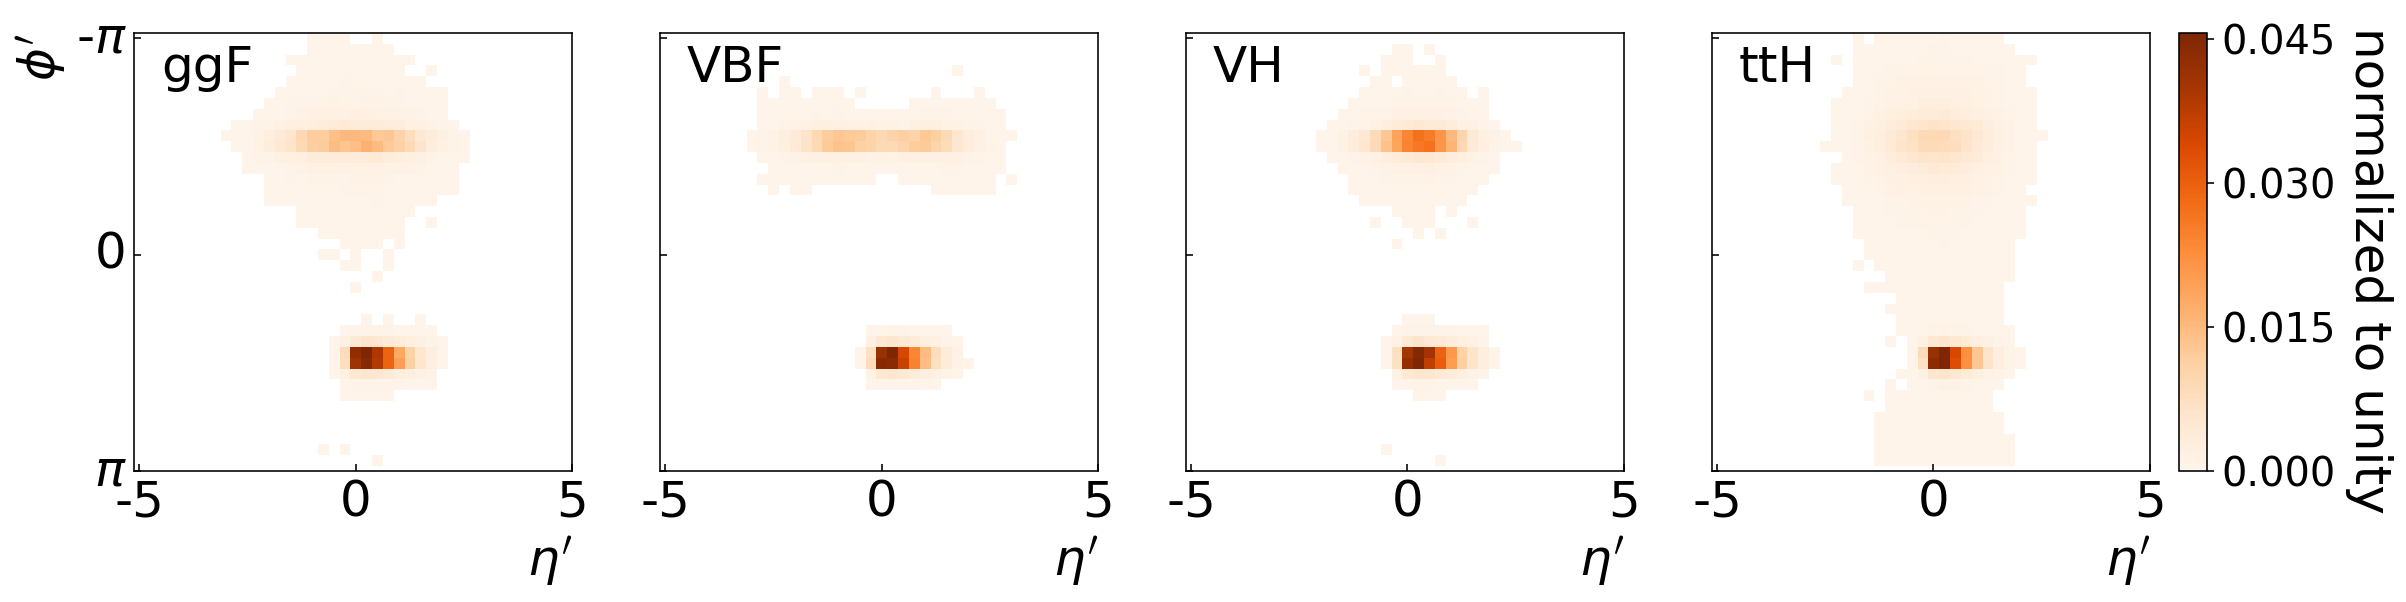

In [28]:
"""
Event Images
"""

images = [ np.array(ggh_event_image_rotated),
           np.array(vbf_event_image_rotated),
           np.array(vh_event_image_rotated),
           np.array(tth_event_image_rotated)]

mode_name = ["ggF", "VBF", "VH", "ttH"]




fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 80))

for index, ax in enumerate(axes.flat):

    eventimage_average = np.average(images[index][:,1],axis=0)

    im = ax.imshow(eventimage_average,vmin=0, 
#                               vmax=round(np.max(jetimage_average),3),
#                           vmax=0.5,
                          cmap=newcmap, origin='upper')
    ax.set_yticks([0,20,40])
    ax.set_yticklabels(["","",""], fontsize=25, rotation=0)
    ax.tick_params(axis='y', direction="in")

    ax.set_xticks([0,20,40])
    ax.set_xticklabels(["-5","0","5"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
    ax.set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
    ax.tick_params(axis='x', direction="in")
    
    if index == 0: 
        ax.set_yticks([0,20,40])
        # plot_axis.set_yticks([20,25,30])
        ax.set_yticklabels(["-$\pi$","0","$\pi$"], fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right")
        ax.set_ylabel("$\phi'$", fontsize=25, horizontalalignment='right',y=1)


    ax.text(x=2, y=4, s=str(mode_name[index]),fontsize=25)
#     ax.text(x=2, y=38, s="p("+str(mode_name[index])+") > 0.9",fontsize=25)
    
ax.text(x=58, y=43, s="normalized to unity", fontsize=25, rotation=270)
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.81, 0.481, 0.01, 0.038])
cbar = fig.colorbar(im, cax=cb_ax)
#  set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(0, 0.051, 0.015))
# cbar.set_ticks(np.arange(0, 0.051, 0.01))
cbar.ax.tick_params(labelsize=20)
# cbar.set_ticklabels(['low', 'medium', 'high'])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig("./Plots/event_image_Charged_nocut.pdf", transparent=True, bbox_inches='tight')
plt.show()

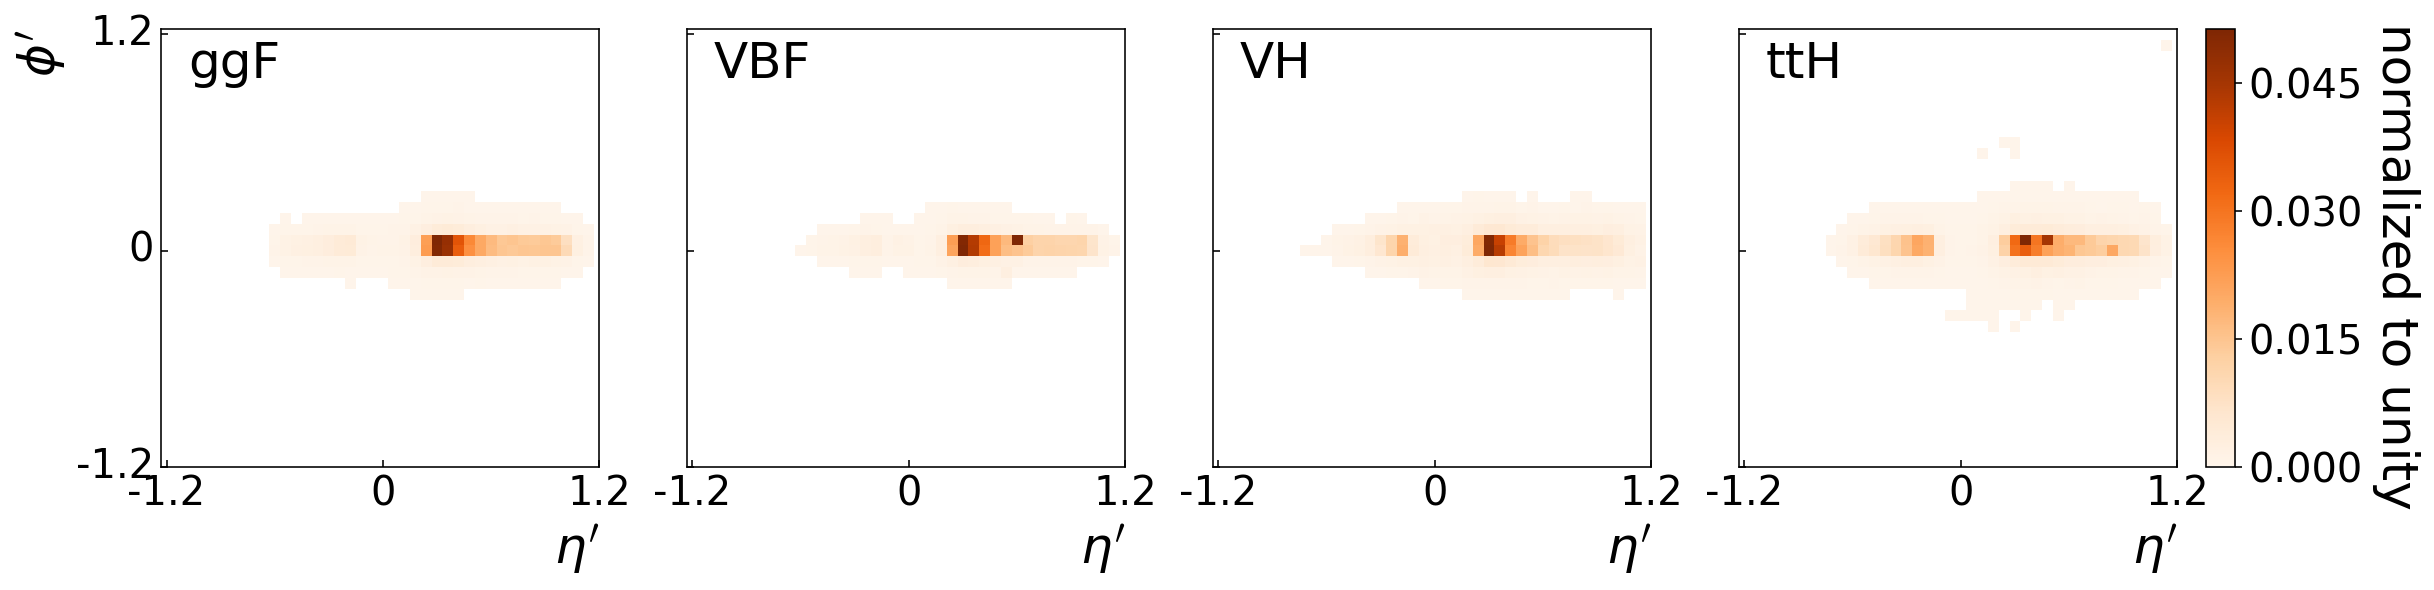

In [31]:
"""
Jet Images
"""

images = [ np.array(ggh_jet_images),
           np.array(vbf_jet_images),
           np.array(vh_jet_images),
           np.array(tth_jet_images)]

mode_name = ["ggF", "VBF", "VH", "ttH"]




fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 80))

for index, ax in enumerate(axes.flat):

    eventimage_average = np.average(images[index][:,1],axis=0)

    im = ax.imshow(eventimage_average,vmin=0, 
#                               vmax=round(np.max(jetimage_average),3),
#                           vmax=0.5,
                          cmap=newcmap, origin='upper')
    ax.set_yticks([0,20,40])
    ax.set_yticklabels(["","",""], fontsize=25, rotation=0)
    ax.tick_params(axis='y', direction="in")
    


    ax.set_xticks([0,20,40])
    ax.set_xticklabels(["-1.2","0","1.2"], fontsize=20, rotation=0, verticalalignment='top', horizontalalignment="center")
    ax.set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
    ax.tick_params(axis='x', direction="in")
    
    if index == 0: 
        ax.set_yticks([0,20,40])
        # plot_axis.set_yticks([20,25,30])
        ax.set_yticklabels(["1.2","0","-1.2"], fontsize=20, rotation=0, verticalalignment='center', horizontalalignment="right")
        ax.set_ylabel("$\phi'$", fontsize=25, horizontalalignment='right',y=1)


    ax.text(x=2, y=4, s=str(mode_name[index]),fontsize=25)
#     ax.text(x=2, y=38, s="p("+str(mode_name[index])+") > 0.9",fontsize=25)
    
ax.text(x=58, y=43, s="normalized to unity", fontsize=25, rotation=270)
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.81, 0.481, 0.01, 0.038])
cbar = fig.colorbar(im, cax=cb_ax)
#  set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(0, 0.061, 0.015))
# cbar.set_ticks(np.arange(0, 0.051, 0.02))
cbar.ax.tick_params(labelsize=20)
# cbar.set_ticklabels(['low', 'medium', 'high'])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig("./Plots/jet_image_Charged_nocut.pdf", transparent=True, bbox_inches='tight')
plt.show()

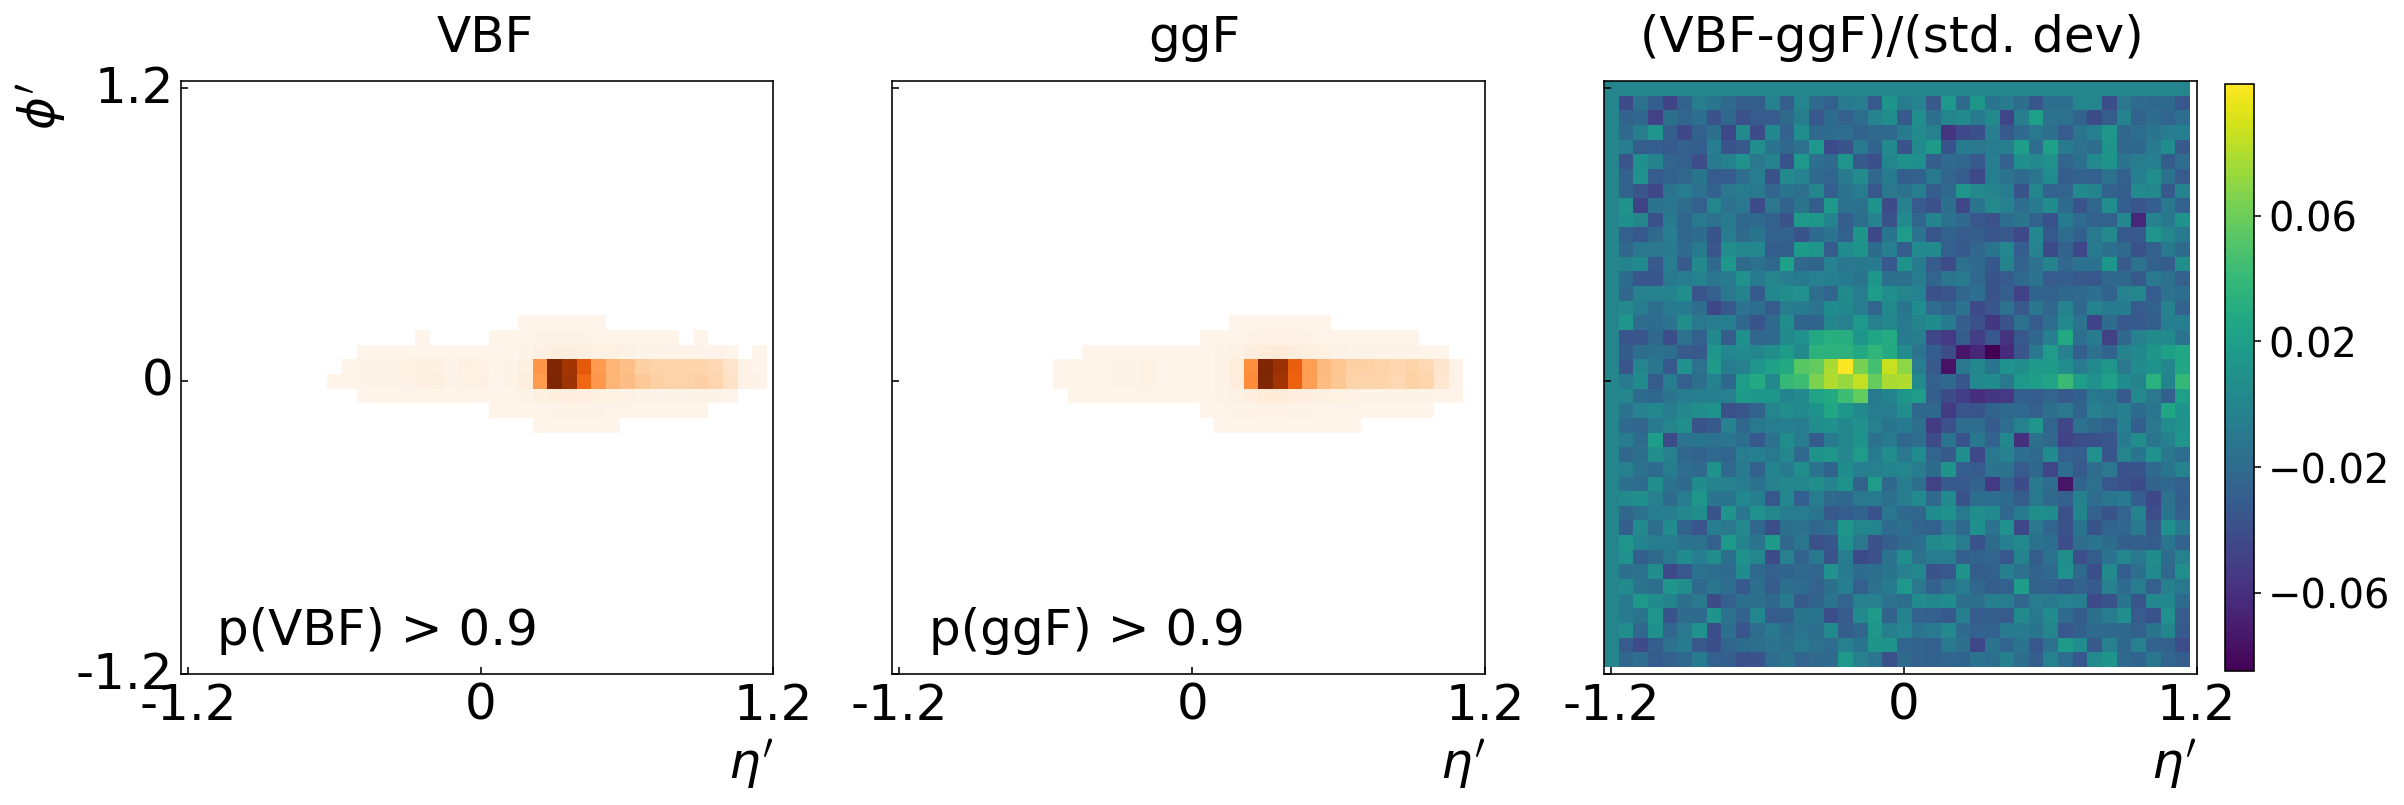

In [24]:
"""
Jet Images
"""

delta_jet = [np.array(vbf_jet_images)[:,1],
             np.array(ggh_jet_images)[:,1],
             (np.array(vbf_jet_images)[:,1]-np.array(ggh_jet_images)[:,1])/(np.std(np.concatenate((np.array(vbf_jet_images)[:,1],np.array(ggh_jet_images)[:,1])), axis=0)+1e-5)
            ]

mode_name = ["VBF", "ggF", "(VBF-ggF)/(std. dev)"]
             
# delta_jet = [np.array(vh_jet_images)[:,1],
#              np.array(tth_jet_images)[:,1],
#              (np.array(vh_jet_images)[:,1]-np.array(tth_jet_images)[:,1])/(np.std(np.concatenate((np.array(vh_jet_images)[:,1],np.array(tth_jet_images)[:,1])), axis=0)+1e-5)
#               ]
# mode_name = ["VH", "ttH", "(VH-ttH)/(std. dev)"]




fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 60))

for index, ax in enumerate(axes.flat):

    eventimage_average = np.average(delta_jet[index],axis=0)

    im = ax.imshow(eventimage_average,vmin=0, 
#                               vmax=round(np.max(jetimage_average),3),
#                           vmax=0.5,
                          cmap=newcmap, origin='upper')
    if index == 2:
        im = ax.imshow(eventimage_average,
                       vmin=round(np.min(eventimage_average),3), 
                        vmax=round(np.max(eventimage_average),3),
                       cmap="viridis", 
                       origin='upper')
        
    ax.set_yticks([0,20,40])
    ax.set_yticklabels(["","",""], fontsize=25, rotation=0)
    ax.tick_params(axis='y', direction="in")
    
#     ax.set_xticks([0,20,40])
#     ax.set_xticklabels(["","",""], fontsize=25, rotation=0)
#     ax.tick_params(axis='x', direction="in")

    ax.set_xticks([0,20,40])
    ax.set_xticklabels(["-1.2","0","1.2"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
    ax.set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
    ax.tick_params(axis='x', direction="in")
    
    if index == 0: 
        ax.set_yticks([0,20,40])
        # plot_axis.set_yticks([20,25,30])
        ax.set_yticklabels(["1.2","0","-1.2"], fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right")
        ax.set_ylabel("$\phi'$", fontsize=25, horizontalalignment='right',y=1)
    if index != 2:
        ax.text(x=17, y=-2.5, s=str(mode_name[index]),fontsize=25)
        ax.text(x=2, y=38, s="p("+str(mode_name[index])+") > 0.9",fontsize=25)
    
    if index == 2:
        ax.text(x=2, y=-2.5, s=str(mode_name[index]),fontsize=25)
    
# ax.text(x=58, y=43, s="normalized to unity", fontsize=25, rotation=270)
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.81, 0.466, 0.01, 0.068])
cbar = fig.colorbar(im, cax=cb_ax)
#  set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(-0.1, 0.1, 0.04))
# cbar.set_ticks(np.arange(-0.3, 0.31, 0.15))
cbar.ax.tick_params(labelsize=20)
# cbar.set_ticklabels(['low', 'medium', 'high'])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
# plt.savefig("./Plots/jet_image_VH_sub_ttH.pdf", transparent=True, bbox_inches='tight')
plt.savefig("./Plots/jet_image_VBF_sub_ggF.pdf", transparent=True, bbox_inches='tight')
plt.show()